In [33]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
from skimage import transform
import os
import pandas as pd
from sklearn.metrics import classification_report

In [35]:
import os

In [37]:
os.getcwd()

'/content/drive/MyDrive/CropDisease'

In [ ]:
os.chdir('./drive/MyDrive/CropDisease')

In [38]:
os.listdir()

['CropDiseasePrediction.ipynb', 'data (1)', 'AugmentedData (1)']

## Image Processing

In [39]:
image = io.imread('data (1)/Brown_spot/DSC_0105.jpg')
image.shape

(279, 1480, 3)

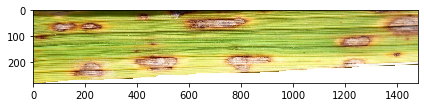

In [40]:
io.imshow(image)

In [ ]:
279* 1480 * 3

574500

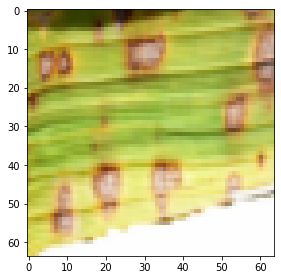

In [41]:
resized = transform.resize(image, output_shape=(64,64))
io.imshow(resized)

In [42]:
64*64*3

12288

In [53]:
class PreProcessor:
    def __init__(self)->None:
        pass
        
    def process_and_normalize(self, path: str):
        image = io.imread(path)
        resized_img = transform.resize(image, output_shape=(64,64))
        return resized_img.flatten()

In [55]:
235/255.0

0.9215686274509803

In [58]:
preprocessor = PreProcessor()
preprocessor.process_and_normalize('data (1)/Brown_spot/DSC_0105.jpg').max()

0.996078431372549

In [59]:
resized.ravel()

array([0.35560662, 0.26807598, 0.03419118, ..., 0.99607843, 0.99607843,
       0.99607843])

In [61]:
os.listdir('data (1)')

['Brown_spot', 'Bacterial_leaf_blight', 'Leaf_smut']

In [62]:
folders = ['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']
images = []
labels = []

In [63]:
preprocessor = PreProcessor()

for disease in os.listdir('data (1)'):
    folder = f'data (1)/{disease}'
    for file in os.listdir(folder):
        from_path = folder+'/'+file
        vector = preprocessor.process_and_normalize(from_path)
        images.append(vector)
        labels.append(folders.index(disease))

In [64]:
len(images)

120

In [66]:
images[0].shape

(12288,)

In [67]:
len(labels)

120

In [71]:
images_vector = np.array(images)
labels  = np.array(labels)

In [70]:
images_vector.shape

(120, 12288)

In [72]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [73]:
df = pd.DataFrame(images)
df['label'] = labels

In [74]:
df

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,label
0,0.933333,0.894118,0.886275,0.933333,0.894118,0.884283,0.929412,0.890196,0.882353,0.929412,...,0.913725,0.854902,0.835294,0.909804,0.850980,0.831373,0.905882,0.847059,0.831373,1
1,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,1
2,0.905882,0.850980,0.835294,0.909804,0.854902,0.839216,0.909804,0.854902,0.839216,0.909804,...,0.929412,0.870588,0.847059,0.925490,0.870588,0.850980,0.925490,0.870588,0.850980,1
3,0.941176,0.913725,0.898039,0.941176,0.913725,0.898039,0.941176,0.913725,0.898039,0.941176,...,0.941176,0.898039,0.866667,0.941176,0.901961,0.866667,0.941176,0.901961,0.866667,1
4,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.648621,0.508762,0.217249,0.673152,0.602512,0.248060,0.725490,0.674510,0.307172,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.346569,0.483599,0.134069,0.349755,0.502696,0.141912,0.359699,0.504797,0.140091,0.350000,...,0.360736,0.495588,0.057108,0.380854,0.490259,0.060231,0.403186,0.496569,0.070588,2
116,0.941176,0.909804,0.890196,0.937255,0.905882,0.880423,0.937255,0.905882,0.878431,0.937255,...,0.949020,0.921569,0.913725,0.949020,0.922941,0.913725,0.949020,0.921569,0.913725,2
117,0.931403,0.886275,0.862745,0.933333,0.886275,0.862745,0.933333,0.886275,0.862745,0.933333,...,0.933333,0.882353,0.854902,0.933333,0.882353,0.858824,0.929412,0.878431,0.854902,2
118,0.699540,0.688664,0.652371,0.705607,0.702171,0.659957,0.702574,0.709528,0.659957,0.702574,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Columns: 12289 entries, 0 to label
dtypes: float64(12288), int64(1)
memory usage: 11.3 MB


In [76]:
df.to_csv('processed_data.csv')

## Split

In [77]:
from sklearn.model_selection import train_test_split

xtrain, xtest,  ytrain, ytest = train_test_split(
    df.drop(columns=['label']), df['label'], test_size=0.2, random_state=33
)

In [78]:
xtrain.shape

(96, 12288)

In [79]:
xtest.shape

(24, 12288)

## MLP

In [80]:
from sklearn.neural_network import MLPClassifier

In [81]:
nn = MLPClassifier(
    hidden_layer_sizes=(32, 64, 128),
    max_iter=4000,
    alpha=0.001,
    random_state=33, 
    verbose=1
)

In [82]:
nn.fit(xtrain, ytrain)

Iteration 1, loss = 1.15484169
Iteration 2, loss = 2.43310658
Iteration 3, loss = 1.76254260
Iteration 4, loss = 1.58881808
Iteration 5, loss = 1.19671140
Iteration 6, loss = 1.10338626
Iteration 7, loss = 1.07587907
Iteration 8, loss = 1.08838321
Iteration 9, loss = 1.06483468
Iteration 10, loss = 1.04893761
Iteration 11, loss = 1.05036097
Iteration 12, loss = 1.01440178
Iteration 13, loss = 1.01015760
Iteration 14, loss = 0.98421697
Iteration 15, loss = 0.97118640
Iteration 16, loss = 0.95273374
Iteration 17, loss = 0.92316756
Iteration 18, loss = 0.90783272
Iteration 19, loss = 0.87599120
Iteration 20, loss = 0.86270765
Iteration 21, loss = 0.83145332
Iteration 22, loss = 0.82104984
Iteration 23, loss = 0.79144250
Iteration 24, loss = 0.78165249
Iteration 25, loss = 0.75833777
Iteration 26, loss = 0.74429310
Iteration 27, loss = 0.72570563
Iteration 28, loss = 0.71220991
Iteration 29, loss = 0.69276209
Iteration 30, loss = 0.68308652
Iteration 31, loss = 0.66316807
Iteration 32, los

MLPClassifier(alpha=0.001, hidden_layer_sizes=(32, 64, 128), max_iter=4000,
              random_state=33, verbose=1)

In [83]:
ypred_on_train = nn.predict(xtrain)
ypred_on_test = nn.predict(xtest)

In [84]:
report_train = classification_report(y_true=ytrain , y_pred=ypred_on_train)
report_test = classification_report(y_true=ytest , y_pred=ypred_on_test)

In [85]:
print(report_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        32

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



In [86]:
print(report_test)

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.46      1.00      0.63         6
           2       0.75      0.38      0.50         8

    accuracy                           0.62        24
   macro avg       0.69      0.66      0.61        24
weighted avg       0.72      0.62      0.62        24



## Histogram Of Oriented Gradients

In [ ]:
from skimage import feature

In [ ]:
class Preprocess:
    def __init__(self, Path: str)->None:
        self.path= Path
        
    def process_and_normalize(self):
        image = io.imread(self.path)
        resized_img = transform.resize(image, output_shape=(64,64))
        hog_vector = feature.hog(resized_img, orientations=9, feature_vector=True, multichannel=True)
        return hog_vector

In [ ]:
images_hog = []
labels_hog = []

In [ ]:
for disease in os.listdir('data'):
    folder = f'.\\data\\{disease}'
    for file in os.listdir(folder):
        from_path = folder+'\\'+file
        processor = Preprocess(from_path)
        vector = processor.process_and_normalize()
        images_hog.append(vector)
        labels_hog.append(folders.index(disease))

C:\Users\happy\AppData\Local\Temp\ipykernel_12044\1431617314.py:8: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_vector = feature.hog(resized_img, orientations=9, feature_vector=True, multichannel=True)


In [ ]:
df_hog = pd.DataFrame(images_hog)
df_hog['label'] = labels_hog

xtrain, xtest,  ytrain, ytest = train_test_split(
    df_hog.drop(columns=['label']), df_hog['label'], test_size=0.2, random_state=33
)

In [ ]:
xtrain.shape

(96, 2916)

In [ ]:
nn1 = MLPClassifier(
    hidden_layer_sizes=(32, 64, 128, 32),
    max_iter=500,
    alpha=0.0001,
    random_state=33, 
    verbose=1
)

In [ ]:
nn1.fit(xtrain, ytrain)

Iteration 1, loss = 1.10376114
Iteration 2, loss = 1.07682217
Iteration 3, loss = 1.05103845
Iteration 4, loss = 1.02480885
Iteration 5, loss = 0.99937671
Iteration 6, loss = 0.97294495
Iteration 7, loss = 0.94575696
Iteration 8, loss = 0.91696768
Iteration 9, loss = 0.88722159
Iteration 10, loss = 0.85734251
Iteration 11, loss = 0.82497295
Iteration 12, loss = 0.79089269
Iteration 13, loss = 0.75506941
Iteration 14, loss = 0.71691111
Iteration 15, loss = 0.67593499
Iteration 16, loss = 0.63186548
Iteration 17, loss = 0.58634548
Iteration 18, loss = 0.54040371
Iteration 19, loss = 0.49317971
Iteration 20, loss = 0.44530528
Iteration 21, loss = 0.39836879
Iteration 22, loss = 0.35171481
Iteration 23, loss = 0.30658457
Iteration 24, loss = 0.26339154
Iteration 25, loss = 0.22340499
Iteration 26, loss = 0.18688069
Iteration 27, loss = 0.15424156
Iteration 28, loss = 0.12536055
Iteration 29, loss = 0.10003474
Iteration 30, loss = 0.07846498
Iteration 31, loss = 0.06053477
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(32, 64, 128, 32), max_iter=500,
              random_state=33, verbose=1)

In [ ]:
ypred_on_train = nn1.predict(xtrain)
ypred_on_test = nn1.predict(xtest)
report_train = classification_report(y_true=ytrain , y_pred=ypred_on_train)
report_test = classification_report(y_true=ytest , y_pred=ypred_on_test)

In [ ]:
print(report_test)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.60      0.30      0.40        10
           2       0.54      0.88      0.67         8

    accuracy                           0.58        24
   macro avg       0.60      0.61      0.58        24
weighted avg       0.60      0.58      0.56        24



In [ ]:
print(report_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        32

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96

